# Self-Driving Car Engineer Nanodegree
*Project of this notebook is the first project in the first term that started at Feb 2017.*
## Project: Finding Lane Lines on the Road
***
**'find_lane_lines.py'** python file is prepared functions to help to draw lane lines in an image or a movie. In this notebook, we will test this help functions right.

### Check Test Environment
Before tests of functions, check your environment to test properly.
#### Import Libraries
To use functions in 'find_lane_lines.py', you should install below libraries.

In [108]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import os
from moviepy.editor import VideoFileClip
from IPython.display import HTML
%matplotlib inline

#### Import Functions
Check that 'find_lane_lines.py' is the proper file.

In [110]:
from find_lane_lines import read_image
from find_lane_lines import convert_to_gray
from find_lane_lines import run_gaussian_smoothing
from find_lane_lines import run_canny_edge_detection
from find_lane_lines import mask_rectangle_img
from find_lane_lines import draw_line_segments
from find_lane_lines import draw_regression_line
from find_lane_lines import combine_images
from find_lane_lines import draw_lane_lines
from find_lane_lines import reset_cache
from find_lane_lines import set_cache_size
from find_lane_lines import draw_lane_lines_with_cache

ImportError: cannot import name set_cache_size

#### Check Test Directories
Test image files are contained in 'raw_images' directory and movie files are in 'raw_movies' directory.

In [72]:
test_img_path = []
for img in os.listdir('raw_images/'):
    test_img_path.append('raw_images/' + img)
test_mv_path = []
for mv in os.listdir('raw_movies/'):
    test_mv_path.append('raw_movies/' + mv)

test_img_path.sort()
test_mv_path.sort()

for img in test_img_path:
    print('IMAGE: ' + img)
for mv in test_mv_path:
    print('MOVIE: ' + mv)

IMAGE: raw_images/challenge_00000.png
IMAGE: raw_images/solidWhiteCurve.jpg
IMAGE: raw_images/solidWhiteRight.jpg
IMAGE: raw_images/solidYellowCurve.jpg
IMAGE: raw_images/solidYellowCurve2.jpg
IMAGE: raw_images/solidYellowLeft.jpg
IMAGE: raw_images/whiteCarLaneSwitch.jpg
MOVIE: raw_movies/challenge.mp4
MOVIE: raw_movies/solidWhiteRight.mp4
MOVIE: raw_movies/solidYellowLeft.mp4


### Test Image: 'raw_images/challenge_00000.png'
#### Read Image

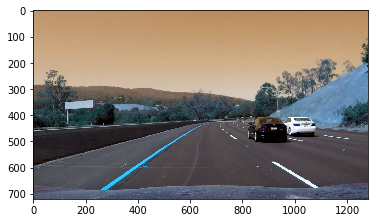

In [73]:
org_img = read_image(test_img_path[0])
plt.imshow(org_img)

#### Convert Image to Gray Scale

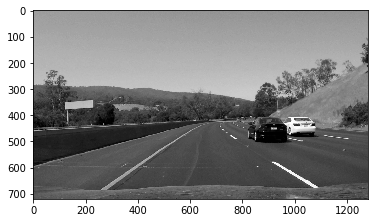

In [74]:
gray_img = convert_to_gray(org_img)
plt.imshow(gray_img, cmap="gray")

#### Blur Image using Gaussian Smoothing

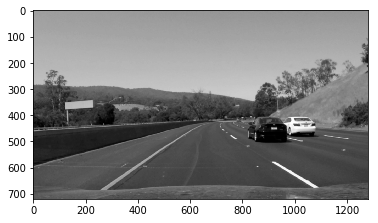

In [75]:
blur_img = run_gaussian_smoothing(gray_img, 5)
plt.imshow(blur_img, cmap="gray")

#### Detect Edge using Canny

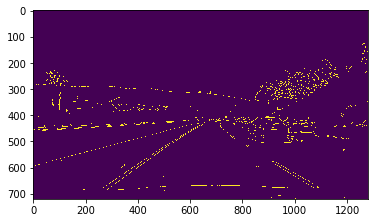

In [76]:
edges_img = run_canny_edge_detection(blur_img, 100, 150)
plt.imshow(edges_img)

#### Select Interest-Rectangle and Mask

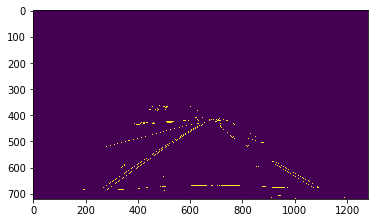

In [78]:
# Image shape = 720 * 1280
masked_img = mask_rectangle_img(edges_img, (50, 720), (470, 350), (620, 350), 
                                (1280, 720))
plt.imshow(masked_img)

#### Find Lines using Hough Transform

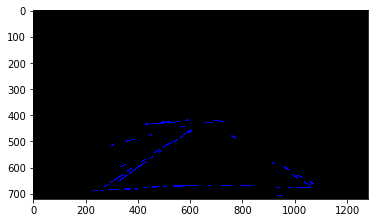

In [79]:
line_segs_img = draw_line_segments(masked_img, 
                                   np.copy(org_img) * 0, # image saving space
                                   (0, 0, 255),  # line color
                                   3,            # line thickness
                                   2,            # rho for Hough
                                   np.pi / 180,  # theta for Hough
                                   10,           # threshold for Hough
                                   20,           # min. line length for Hough
                                   10            # max. line gap for Hough
                                  )
plt.imshow(line_segs_img)

#### Find Regression Straight Line

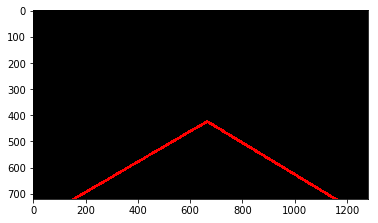

In [80]:
reg_line_img = draw_regression_line(masked_img, np.copy(org_img) * 0, 
                                    line_color=(255, 0, 0), line_thick=10)
plt.imshow(reg_line_img)

#### Combine Original Image and Regression Lines Image

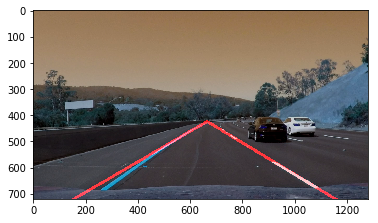

In [81]:
comb_img = combine_images(org_img, reg_line_img)
plt.imshow(comb_img)

#### Draw Lane Lines in Image
Skip all steps above, draw lane lines in the image directly.

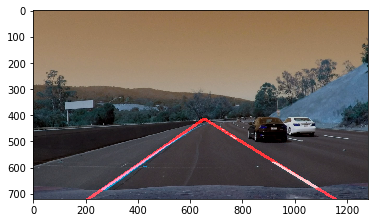

In [82]:
plt.imshow(draw_lane_lines(read_image(test_img_path[0])))

### Test Image: 'raw_images/solidWhiteCurve.jpg'

TEST IMAGE = raw_images/solidWhiteCurve.jpg


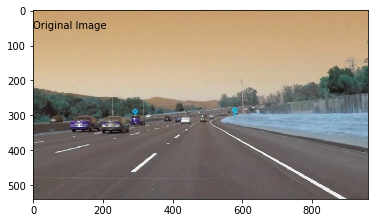

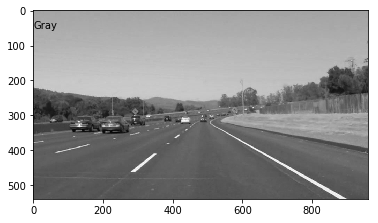

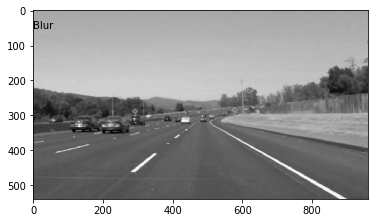

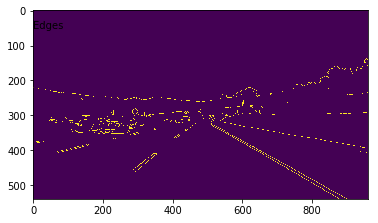

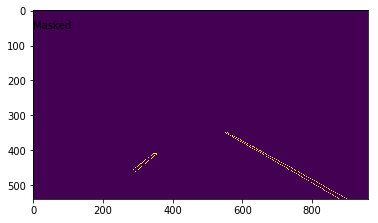

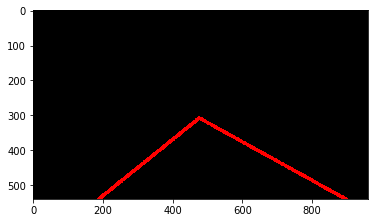

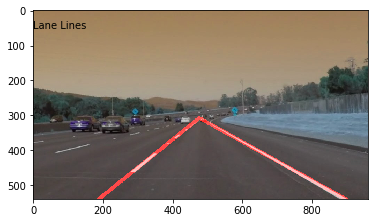

In [83]:
img_path = test_img_path[1]
print("TEST IMAGE = " + img_path)

# Read Image
org_img = read_image(img_path)
plt.figure()
plt.text(0, 50, "Original Image")
plt.imshow(org_img)

# Convert Image to Gray Scale
gray_img = convert_to_gray(org_img)
plt.figure()
plt.text(0, 50, "Gray")
plt.imshow(gray_img, cmap="gray")

# Blur Image using Gaussian Smoothing
blur_img = run_gaussian_smoothing(gray_img, 5)
plt.figure()
plt.text(0, 50, "Blur")
plt.imshow(blur_img, cmap="gray")

# Detect Edge using Canny
edges_img = run_canny_edge_detection(blur_img, 100, 150)
plt.figure()
plt.text(0, 50, "Edges")
plt.imshow(edges_img)

# Select Interest-Rectangle and Mask
img_shape = org_img.shape
masked_img = mask_rectangle_img(edges_img, (50, img_shape[0]), (470, 350),
                                (620, 350), (img_shape[1], img_shape[0]))
plt.figure()
plt.text(0, 50, "Masked")
plt.imshow(masked_img)

# Find Regression Straight Line
reg_line_img = draw_regression_line(masked_img, np.copy(org_img) * 0, 
                                    line_color=(255, 0, 0), line_thick=10)
plt.figure()
plt.text(0, 50, "Regression Lines")
plt.imshow(reg_line_img)

# Combine Original Image and Regression Lines Image
comb_img = combine_images(org_img, reg_line_img)
plt.figure()
plt.text(0, 50, "Lane Lines")
plt.imshow(comb_img)

### Test Image: 'raw_images/solidWhiteRight.jpg'

TEST IMAGE = raw_images/solidWhiteRight.jpg


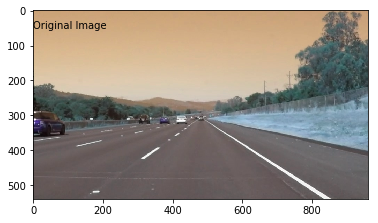

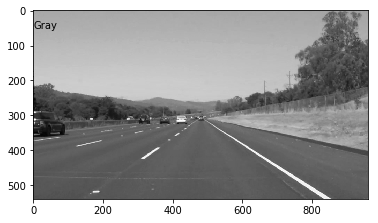

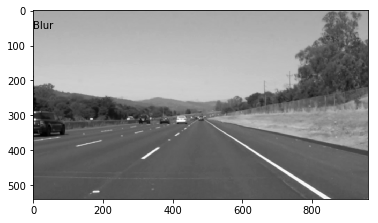

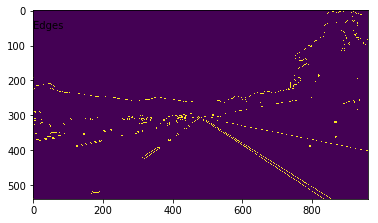

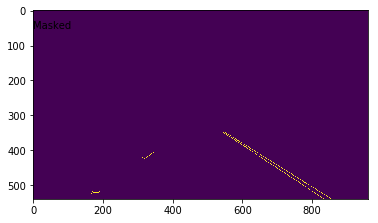

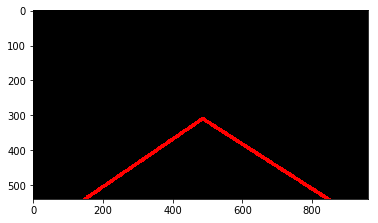

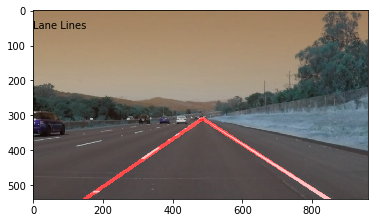

In [84]:
img_path = test_img_path[2]
print("TEST IMAGE = " + img_path)

# Read Image
org_img = read_image(img_path)
plt.figure()
plt.text(0, 50, "Original Image")
plt.imshow(org_img)

# Convert Image to Gray Scale
gray_img = convert_to_gray(org_img)
plt.figure()
plt.text(0, 50, "Gray")
plt.imshow(gray_img, cmap="gray")

# Blur Image using Gaussian Smoothing
blur_img = run_gaussian_smoothing(gray_img, 5)
plt.figure()
plt.text(0, 50, "Blur")
plt.imshow(blur_img, cmap="gray")

# Detect Edge using Canny
edges_img = run_canny_edge_detection(blur_img, 100, 150)
plt.figure()
plt.text(0, 50, "Edges")
plt.imshow(edges_img)

# Select Interest-Rectangle and Mask
img_shape = org_img.shape
masked_img = mask_rectangle_img(edges_img, (50, img_shape[0]), (470, 350),
                                (620, 350), (img_shape[1], img_shape[0]))
plt.figure()
plt.text(0, 50, "Masked")
plt.imshow(masked_img)

# Find Regression Straight Line
reg_line_img = draw_regression_line(masked_img, np.copy(org_img) * 0, 
                                    line_color=(255, 0, 0), line_thick=10)
plt.figure()
plt.text(0, 50, "Regression Lines")
plt.imshow(reg_line_img)

# Combine Original Image and Regression Lines Image
comb_img = combine_images(org_img, reg_line_img)
plt.figure()
plt.text(0, 50, "Lane Lines")
plt.imshow(comb_img)

### Test Image: 'raw_images/solidYellowCurve.jpg'

TEST IMAGE = raw_images/solidYellowCurve.jpg


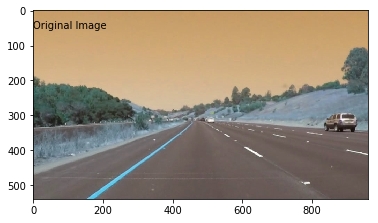

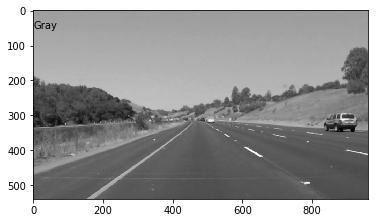

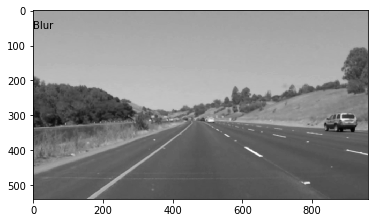

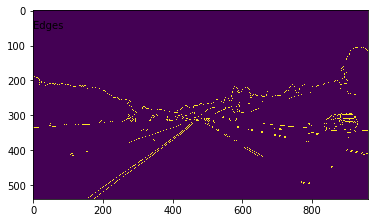

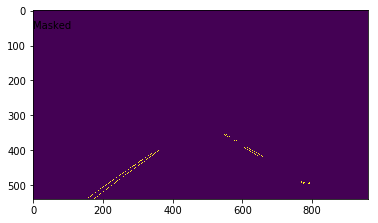

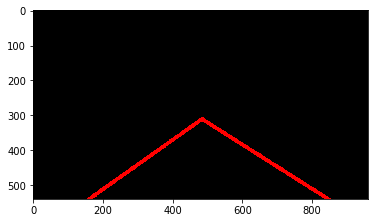

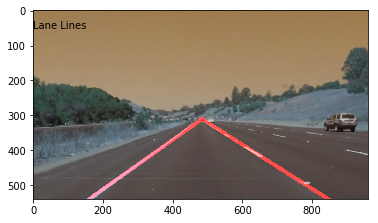

In [85]:
img_path = test_img_path[3]
print("TEST IMAGE = " + img_path)

# Read Image
org_img = read_image(img_path)
plt.figure()
plt.text(0, 50, "Original Image")
plt.imshow(org_img)

# Convert Image to Gray Scale
gray_img = convert_to_gray(org_img)
plt.figure()
plt.text(0, 50, "Gray")
plt.imshow(gray_img, cmap="gray")

# Blur Image using Gaussian Smoothing
blur_img = run_gaussian_smoothing(gray_img, 5)
plt.figure()
plt.text(0, 50, "Blur")
plt.imshow(blur_img, cmap="gray")

# Detect Edge using Canny
edges_img = run_canny_edge_detection(blur_img, 100, 150)
plt.figure()
plt.text(0, 50, "Edges")
plt.imshow(edges_img)

# Select Interest-Rectangle and Mask
img_shape = org_img.shape
masked_img = mask_rectangle_img(edges_img, (50, img_shape[0]), (470, 350),
                                (620, 350), (img_shape[1], img_shape[0]))
plt.figure()
plt.text(0, 50, "Masked")
plt.imshow(masked_img)

# Find Regression Straight Line
reg_line_img = draw_regression_line(masked_img, np.copy(org_img) * 0, 
                                    line_color=(255, 0, 0), line_thick=10)
plt.figure()
plt.text(0, 50, "Regression Lines")
plt.imshow(reg_line_img)

# Combine Original Image and Regression Lines Image
comb_img = combine_images(org_img, reg_line_img)
plt.figure()
plt.text(0, 50, "Lane Lines")
plt.imshow(comb_img)

### Test Image: 'raw_images/solidYellowCurve2.jpg'

TEST IMAGE = raw_images/solidYellowCurve2.jpg


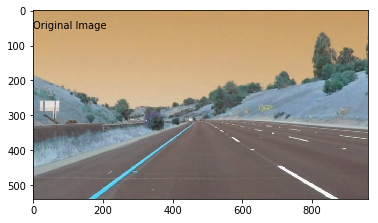

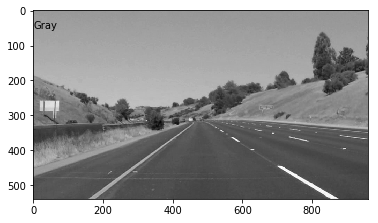

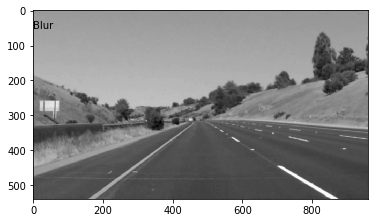

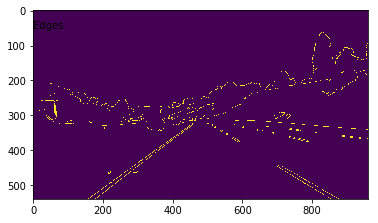

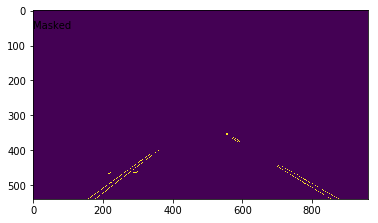

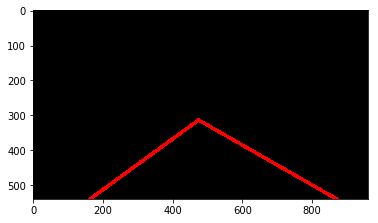

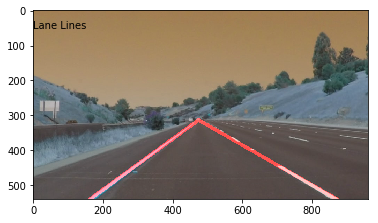

In [86]:
img_path = test_img_path[4]
print("TEST IMAGE = " + img_path)

# Read Image
org_img = read_image(img_path)
plt.figure()
plt.text(0, 50, "Original Image")
plt.imshow(org_img)

# Convert Image to Gray Scale
gray_img = convert_to_gray(org_img)
plt.figure()
plt.text(0, 50, "Gray")
plt.imshow(gray_img, cmap="gray")

# Blur Image using Gaussian Smoothing
blur_img = run_gaussian_smoothing(gray_img, 5)
plt.figure()
plt.text(0, 50, "Blur")
plt.imshow(blur_img, cmap="gray")

# Detect Edge using Canny
edges_img = run_canny_edge_detection(blur_img, 100, 150)
plt.figure()
plt.text(0, 50, "Edges")
plt.imshow(edges_img)

# Select Interest-Rectangle and Mask
img_shape = org_img.shape
masked_img = mask_rectangle_img(edges_img, (50, img_shape[0]), (470, 350),
                                (620, 350), (img_shape[1], img_shape[0]))
plt.figure()
plt.text(0, 50, "Masked")
plt.imshow(masked_img)

# Find Regression Straight Line
reg_line_img = draw_regression_line(masked_img, np.copy(org_img) * 0, 
                                    line_color=(255, 0, 0), line_thick=10)
plt.figure()
plt.text(0, 50, "Regression Lines")
plt.imshow(reg_line_img)

# Combine Original Image and Regression Lines Image
comb_img = combine_images(org_img, reg_line_img)
plt.figure()
plt.text(0, 50, "Lane Lines")
plt.imshow(comb_img)

### Test Image: 'raw_images/solidYellowLeft.jpg'

TEST IMAGE = raw_images/solidYellowLeft.jpg


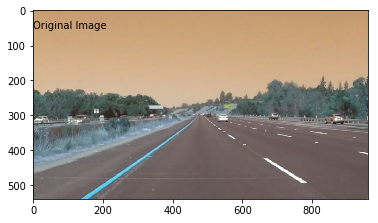

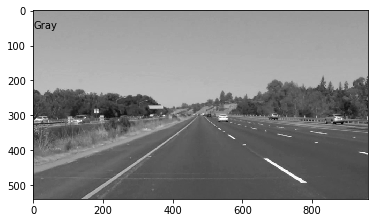

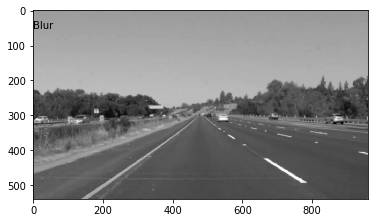

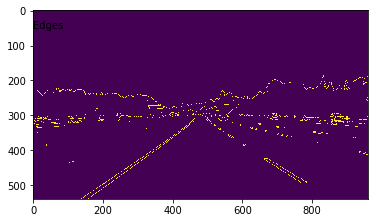

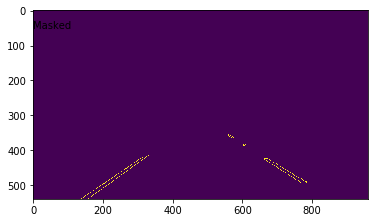

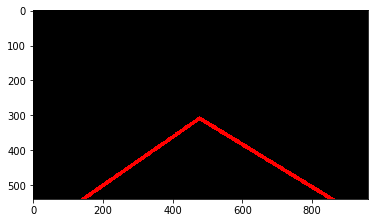

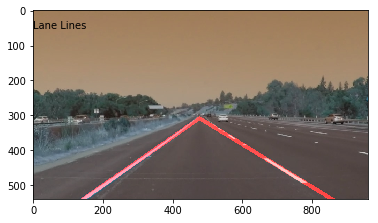

In [87]:
img_path = test_img_path[5]
print("TEST IMAGE = " + img_path)

# Read Image
org_img = read_image(img_path)
plt.figure()
plt.text(0, 50, "Original Image")
plt.imshow(org_img)

# Convert Image to Gray Scale
gray_img = convert_to_gray(org_img)
plt.figure()
plt.text(0, 50, "Gray")
plt.imshow(gray_img, cmap="gray")

# Blur Image using Gaussian Smoothing
blur_img = run_gaussian_smoothing(gray_img, 5)
plt.figure()
plt.text(0, 50, "Blur")
plt.imshow(blur_img, cmap="gray")

# Detect Edge using Canny
edges_img = run_canny_edge_detection(blur_img, 100, 150)
plt.figure()
plt.text(0, 50, "Edges")
plt.imshow(edges_img)

# Select Interest-Rectangle and Mask
img_shape = org_img.shape
masked_img = mask_rectangle_img(edges_img, (50, img_shape[0]), (470, 350),
                                (620, 350), (img_shape[1], img_shape[0]))
plt.figure()
plt.text(0, 50, "Masked")
plt.imshow(masked_img)

# Find Regression Straight Line
reg_line_img = draw_regression_line(masked_img, np.copy(org_img) * 0, 
                                    line_color=(255, 0, 0), line_thick=10)
plt.figure()
plt.text(0, 50, "Regression Lines")
plt.imshow(reg_line_img)

# Combine Original Image and Regression Lines Image
comb_img = combine_images(org_img, reg_line_img)
plt.figure()
plt.text(0, 50, "Lane Lines")
plt.imshow(comb_img)

### Test Image: 'raw_images/whiteCarLaneSwitch.jpg'

TEST IMAGE = raw_images/whiteCarLaneSwitch.jpg


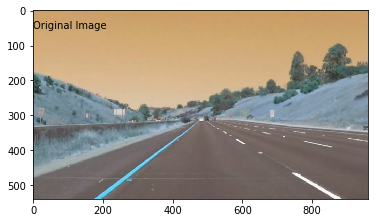

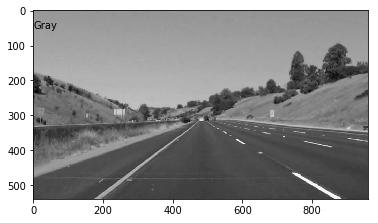

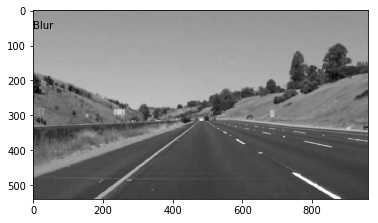

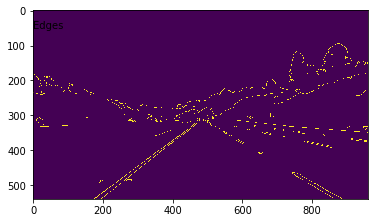

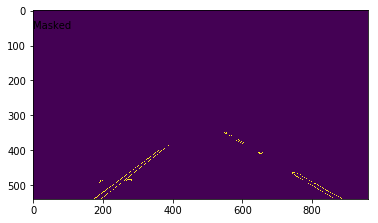

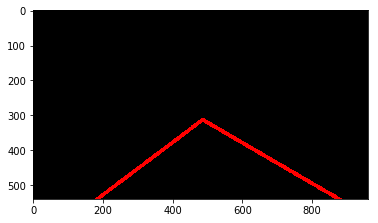

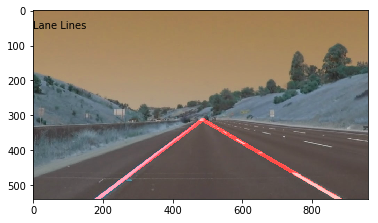

In [90]:
img_path = test_img_path[6]
print("TEST IMAGE = " + img_path)

# Read Image
org_img = read_image(img_path)
plt.figure()
plt.text(0, 50, "Original Image")
plt.imshow(org_img)

# Convert Image to Gray Scale
gray_img = convert_to_gray(org_img)
plt.figure()
plt.text(0, 50, "Gray")
plt.imshow(gray_img, cmap="gray")

# Blur Image using Gaussian Smoothing
blur_img = run_gaussian_smoothing(gray_img, 5)
plt.figure()
plt.text(0, 50, "Blur")
plt.imshow(blur_img, cmap="gray")

# Detect Edge using Canny
edges_img = run_canny_edge_detection(blur_img, 100, 150)
plt.figure()
plt.text(0, 50, "Edges")
plt.imshow(edges_img)

# Select Interest-Rectangle and Mask
img_shape = org_img.shape
masked_img = mask_rectangle_img(edges_img, (50, img_shape[0]), (470, 350),
                                (620, 350), (img_shape[1], img_shape[0]))
plt.figure()
plt.text(0, 50, "Masked")
plt.imshow(masked_img)

# Find Regression Straight Line
reg_line_img = draw_regression_line(masked_img, np.copy(org_img) * 0, 
                                    line_color=(255, 0, 0), line_thick=10)
plt.figure()
plt.text(0, 50, "Regression Lines")
plt.imshow(reg_line_img)

# Combine Original Image and Regression Lines Image
comb_img = combine_images(org_img, reg_line_img)
plt.figure()
plt.text(0, 50, "Lane Lines")
plt.imshow(comb_img)

### Test Movie: 'raw_movies/challenge.mp4'
#### Without Cache

In [92]:
new_movie_name = 'fll_challenge.mp4'
clip = VideoFileClip('raw_movies/challenge.mp4')
new_clip = clip.fl_image(draw_lane_lines)
%time new_clip.write_videofile(new_movie_name, audio=False)

[MoviePy] >>>> Building video fll_challenge.mp4
[MoviePy] Writing video fll_challenge.mp4


100%|██████████| 251/251 [00:07<00:00, 33.04it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: fll_challenge.mp4 

CPU times: user 5.01 s, sys: 288 ms, total: 5.3 s
Wall time: 8.45 s


Play the video inline.

In [95]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(new_movie_name))

#### With Cache
The previous Hough transformed lines of previous frames are used as a cache. Default cached size is 100.

In [107]:
new_movie_name = 'fll_cache_challenge.mp4'
clip = VideoFileClip('raw_movies/challenge.mp4')
reset_cache()
set_cache_size(50)
new_clip = clip.fl_image(draw_lane_lines_with_cache)
%time new_clip.write_videofile(new_movie_name, audio=False)

NameError: name 'set_cache_size' is not defined

In [99]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(new_movie_name))

### Test Movie: 'raw_movies/solidWhiteRight.mp4'
#### Without Cache

In [100]:
new_movie_name = 'fll_solidWhiteRight.mp4'
clip = VideoFileClip('raw_movies/solidWhiteRight.mp4')
new_clip = clip.fl_image(draw_lane_lines)
%time new_clip.write_videofile(new_movie_name, audio=False)

[MoviePy] >>>> Building video fll_solidWhiteRight.mp4
[MoviePy] Writing video fll_solidWhiteRight.mp4


100%|█████████▉| 221/222 [00:03<00:00, 65.78it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: fll_solidWhiteRight.mp4 

CPU times: user 1.78 s, sys: 160 ms, total: 1.94 s
Wall time: 3.81 s


In [101]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(new_movie_name))

#### With Cache
The previous Hough transformed lines of previous frames are used as a cache. Default cached size is 100.

In [102]:
new_movie_name = 'fll_cache_solidWhiteRight.mp4'
clip = VideoFileClip('raw_movies/solidWhiteRight.mp4')
reset_cache()
new_clip = clip.fl_image(draw_lane_lines_with_cache)
%time new_clip.write_videofile(new_movie_name, audio=False)

[MoviePy] >>>> Building video fll_cache_solidWhiteRight.mp4
[MoviePy] Writing video fll_cache_solidWhiteRight.mp4


100%|█████████▉| 221/222 [00:03<00:00, 61.30it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: fll_cache_solidWhiteRight.mp4 

CPU times: user 2.43 s, sys: 108 ms, total: 2.54 s
Wall time: 4.03 s


In [103]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(new_movie_name))

### Test Movie: 'raw_movies/solidYellowLeft.mp4'
#### Withou Cache

In [104]:
new_movie_name = 'fll_solidYellowLeft.mp4'
clip = VideoFileClip('raw_movies/solidYellowLeft.mp4')
new_clip = clip.fl_image(draw_lane_lines)
%time new_clip.write_videofile(new_movie_name, audio=False)

[MoviePy] >>>> Building video fll_solidYellowLeft.mp4
[MoviePy] Writing video fll_solidYellowLeft.mp4


100%|█████████▉| 681/682 [00:09<00:00, 68.93it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: fll_solidYellowLeft.mp4 

CPU times: user 5.31 s, sys: 464 ms, total: 5.78 s
Wall time: 10.3 s


In [ ]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(new_movie_name))

#### With Cache
The previous Hough transformed lines of previous frames are used as a cache. Default cached size is 100.

In [ ]:
new_movie_name = 'fll_cache_solidYellowLeft.mp4'
clip = VideoFileClip('raw_movies/solidYellowLeft.mp4')
reset_cache()
new_clip = clip.fl_image(draw_lane_lines_with_cache)
%time new_clip.write_videofile(new_movie_name, audio=False)

In [ ]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(new_movie_name))